# Import library yang dibutuhkan

In [15]:
# Import library pandas dengan alias 'pd'
import pandas as pd

# Import library numpy dengan alias 'np'
import numpy as np

# Import library seaborn dengan alias 'sns'
import seaborn as sns

# Import library matplotlib.pyplot dengan alias 'plt'
import matplotlib.pyplot as plt






# Membaca file CSV dari Github

In [16]:
# URL ke file CSV di GitHub yang akan diimpor
url = 'https://raw.githubusercontent.com/hananlu/basicPython/master/Dataset/usaCars.csv'

# Membaca file CSV dari URL ke dalam DataFrame menggunakan pandas
df = pd.read_csv(url)

# Garis pemisah antara dua blok informasi
print("=" * 50)

# Menampilkan informasi rinci tentang DataFrame
df.info()

# Garis pemisah antara dua blok informasi
print("=" * 50)

# Menampilkan beberapa 5 baris pertama dari DataFrame untuk memeriksa data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Menghitung jumlah baris dan kolom

In [5]:
# Menampilkan banyaknya baris dan kolom
jumlah_baris, jumlah_kolom = df.shape

# Menampilkan hasil
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 2499
Jumlah Kolom: 13


Ringkasan statistik deskriptif dari DataFrame

In [6]:
# Menampilkan ringkasan statistik deskriptif
summary_stats = df.describe()
print(summary_stats)

        Unnamed: 0         price         year       mileage           lot
count  2499.000000   2499.000000  2499.000000  2.499000e+03  2.499000e+03
mean   1249.000000  18767.671469  2016.714286  5.229869e+04  1.676914e+08
std     721.543484  12116.094936     3.442656  5.970552e+04  2.038772e+05
min       0.000000      0.000000  1973.000000  0.000000e+00  1.593488e+08
25%     624.500000  10200.000000  2016.000000  2.146650e+04  1.676253e+08
50%    1249.000000  16900.000000  2018.000000  3.536500e+04  1.677451e+08
75%    1873.500000  25555.500000  2019.000000  6.347250e+04  1.677798e+08
max    2498.000000  84900.000000  2020.000000  1.017936e+06  1.678055e+08


Menampilkan grafik distribusi merk mobil

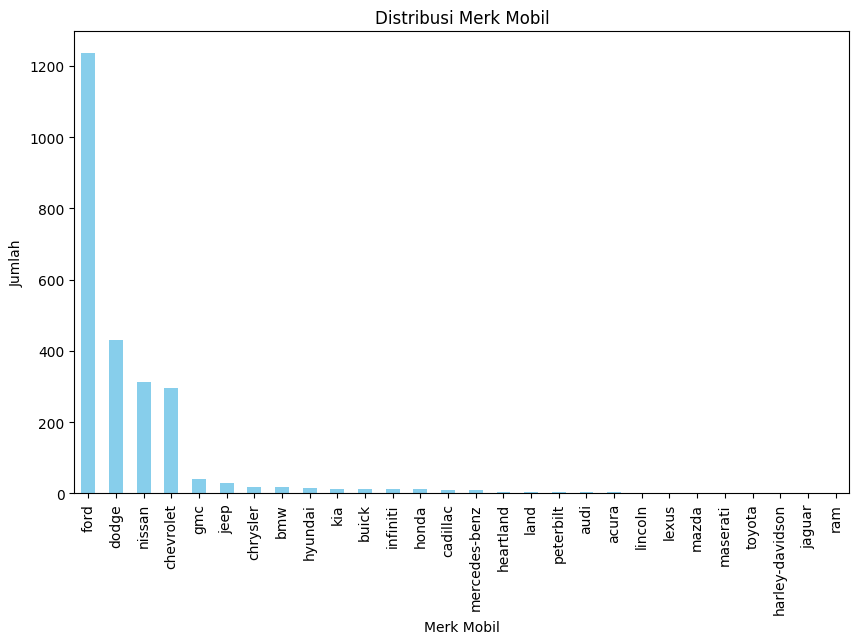

In [18]:
# Menghitung jumlah setiap merk
merk_counts = df['brand'].value_counts()

# Menyiapkan plot
plt.figure(figsize=(10, 6))
merk_counts.plot(kind='bar', color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Merk Mobil')
plt.ylabel('Jumlah')
plt.title('Distribusi Merk Mobil')

# Menampilkan plot
plt.show()

# Dibawah ini Unproduction (coba-coba)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB
None


In [19]:
print(df.describe())


        Unnamed: 0         price         year       mileage           lot
count  2499.000000   2499.000000  2499.000000  2.499000e+03  2.499000e+03
mean   1249.000000  18767.671469  2016.714286  5.229869e+04  1.676914e+08
std     721.543484  12116.094936     3.442656  5.970552e+04  2.038772e+05
min       0.000000      0.000000  1973.000000  0.000000e+00  1.593488e+08
25%     624.500000  10200.000000  2016.000000  2.146650e+04  1.676253e+08
50%    1249.000000  16900.000000  2018.000000  3.536500e+04  1.677451e+08
75%    1873.500000  25555.500000  2019.000000  6.347250e+04  1.677798e+08
max    2498.000000  84900.000000  2020.000000  1.017936e+06  1.678055e+08


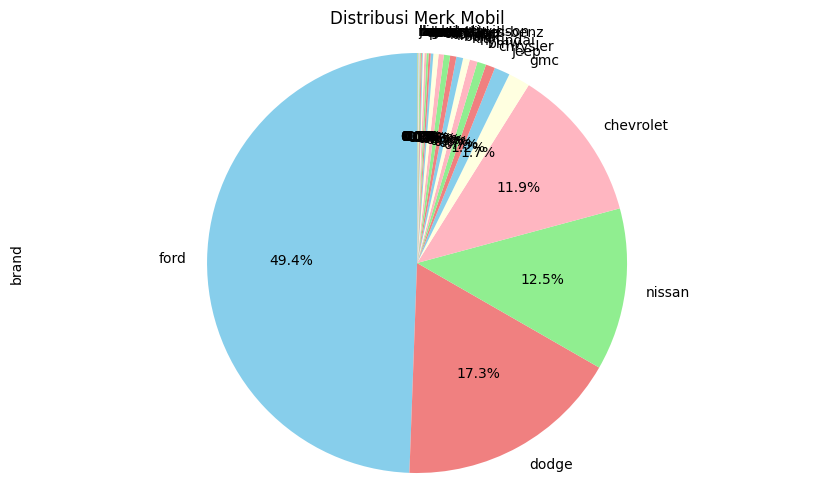

In [ ]:
# Menghitung jumlah setiap merk
merk_counts = df['brand'].value_counts()

# Menyiapkan plot
plt.figure(figsize=(10, 6))
merk_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightyellow'])

# Menambahkan label dan judul
plt.axis('equal')
plt.title('Distribusi Merk Mobil')

# Menampilkan plot
plt.show()
